In [ ]:
import pandas as pd
import numpy as np
import os
import random as shuffle
from random import shuffle
from statsmodels.stats.weightstats import ttest_ind
import statistics

In [2]:
df = pd.read_csv('0050.perovskitedata_DRPFeatures_2020-04-17 - 0050.perovskitedata_DRPFeatures_2020-04-17-2.csv')
pd.set_option('display.max_rows',500) # lines 1,2,3 make sure that full output is shown
pd.set_option('display.max_columns',500) # lines 1,2,3 make sure that full output is shown
pd.set_option('display.width',1000) # lines 1,2,3 make sure that full output is shown
print(df) # read in the csv file (.0050 perovskite_data)

                                          Date                         Name  Relative_Humidity  Crystal_Score   Only_Date
0      2019-02-21T16_43_20.274786+00_00_LBL_A1  FCTHQYIDLRRROX-UHFFFAOYSA-N          18.326946              2  2019-02-21
1      2019-02-21T16_43_20.274786+00_00_LBL_G1  FCTHQYIDLRRROX-UHFFFAOYSA-N          18.326946              4  2019-02-21
2      2019-02-21T16_43_20.274786+00_00_LBL_B1  FCTHQYIDLRRROX-UHFFFAOYSA-N          18.326946              4  2019-02-21
3      2019-02-21T16_43_20.274786+00_00_LBL_D1  FCTHQYIDLRRROX-UHFFFAOYSA-N          18.326946              1  2019-02-21
4      2019-02-21T16_43_20.274786+00_00_LBL_F1  FCTHQYIDLRRROX-UHFFFAOYSA-N          18.326946              4  2019-02-21
...                                        ...                          ...                ...            ...         ...
8039  2019-06-27T12_52_20.503028+00_00_LBL_E12  QRFXELVDJSDWHX-UHFFFAOYSA-N          62.997802              1  2019-06-27
8040  2019-06-27T12_52_2

In [3]:
grpd = df.groupby(['Relative_Humidity','Crystal_Score','Name']).size().to_frame('Total').reset_index() # it is the best version, spits out 3 neat columns: position, crystal score, and the total
print(grpd) # to get categories of RH, Name, and Total and nicely split it

     Relative_Humidity  Crystal_Score                         Name  Total
0            18.326946              1  FCTHQYIDLRRROX-UHFFFAOYSA-N     42
1            18.326946              2  FCTHQYIDLRRROX-UHFFFAOYSA-N      3
2            18.326946              4  FCTHQYIDLRRROX-UHFFFAOYSA-N     49
3            20.037970              1  XFYICZOIWSBQSK-UHFFFAOYSA-N     48
4            20.037970              2  XFYICZOIWSBQSK-UHFFFAOYSA-N      5
5            20.037970              4  XFYICZOIWSBQSK-UHFFFAOYSA-N     18
6            21.725510              1  DMFMZFFIQRMJQZ-UHFFFAOYSA-N     59
7            21.725510              2  DMFMZFFIQRMJQZ-UHFFFAOYSA-N     22
8            21.725510              3  DMFMZFFIQRMJQZ-UHFFFAOYSA-N     10
9            21.725510              4  DMFMZFFIQRMJQZ-UHFFFAOYSA-N      5
10           22.522656              1  JMXLWMIFDJCGBV-UHFFFAOYSA-N      5
11           22.522656              1  UMDDLGMCNFAZDX-UHFFFAOYSA-O     60
12           22.522656              2 

In [12]:
array = ['GGYGJCFIYJVWIP-UHFFFAOYSA-N']
H = grpd.loc[(grpd['Crystal_Score'] == 3) & grpd['Name'].isin(array)]
F = H.Total
H #presence of all inchikeys under crystal score of 1

,Relative_Humidity,Crystal_Score,Name,Total
100,44.224427,3,GGYGJCFIYJVWIP-UHFFFAOYSA-N,21
112,44.888950,3,GGYGJCFIYJVWIP-UHFFFAOYSA-N,6
204,54.074510,3,GGYGJCFIYJVWIP-UHFFFAOYSA-N,18
226,54.749741,3,GGYGJCFIYJVWIP-UHFFFAOYSA-N,11
247,56.053286,3,GGYGJCFIYJVWIP-UHFFFAOYSA-N,11
269,57.051064,3,GGYGJCFIYJVWIP-UHFFFAOYSA-N,25
283,58.439000,3,GGYGJCFIYJVWIP-UHFFFAOYSA-N,3
325,61.071130,3,GGYGJCFIYJVWIP-UHFFFAOYSA-N,31
339,62.997802,3,GGYGJCFIYJVWIP-UHFFFAOYSA-N,24


In [21]:
array = ['XFYICZOIWSBQSK-UHFFFAOYSA-N', 'JMXLWMIFDJCGBV-UHFFFAOYSA-N', 'CALQKRVFTWDYDG-UHFFFAOYSA-N', 'GGYGJCFIYJVWIP-UHFFFAOYSA-N', 'VMLAEGAAHIIWJX-UHFFFAOYSA-N', 'FCTHQYIDLRRROX-UHFFFAOYSA-N', 'PXWSKGXEHZHFJA-UHFFFAOYSA-N', 'DMFMZFFIQRMJQZ-UHFFFAOYSA-N', 'QRFXELVDJSDWHX-UHFFFAOYSA-N', 'UMDDLGMCNFAZDX-UHFFFAOYSA-O', 'SQXJHWOXNLTOOO-UHFFFAOYSA-N']
H = grpd.loc[(grpd['Crystal_Score'] == 2) & grpd['Name'].isin(array)]
F = H.Total
#H #presence of all inchikeys under crystal score of 2

In [9]:
array = ['XFYICZOIWSBQSK-UHFFFAOYSA-N', 'JMXLWMIFDJCGBV-UHFFFAOYSA-N', 'CALQKRVFTWDYDG-UHFFFAOYSA-N', 'GGYGJCFIYJVWIP-UHFFFAOYSA-N', 'VMLAEGAAHIIWJX-UHFFFAOYSA-N', 'FCTHQYIDLRRROX-UHFFFAOYSA-N', 'PXWSKGXEHZHFJA-UHFFFAOYSA-N', 'DMFMZFFIQRMJQZ-UHFFFAOYSA-N', 'QRFXELVDJSDWHX-UHFFFAOYSA-N', 'UMDDLGMCNFAZDX-UHFFFAOYSA-O', 'SQXJHWOXNLTOOO-UHFFFAOYSA-N']
H = grpd.loc[(grpd['Crystal_Score'] == 3) & grpd['Name'].isin(array)]
F = H.Total
#H #presence of all inchikeys under crystal score of 3

In [10]:
array = ['XFYICZOIWSBQSK-UHFFFAOYSA-N', 'JMXLWMIFDJCGBV-UHFFFAOYSA-N', 'CALQKRVFTWDYDG-UHFFFAOYSA-N', 'GGYGJCFIYJVWIP-UHFFFAOYSA-N', 'VMLAEGAAHIIWJX-UHFFFAOYSA-N', 'FCTHQYIDLRRROX-UHFFFAOYSA-N', 'PXWSKGXEHZHFJA-UHFFFAOYSA-N', 'DMFMZFFIQRMJQZ-UHFFFAOYSA-N', 'QRFXELVDJSDWHX-UHFFFAOYSA-N', 'UMDDLGMCNFAZDX-UHFFFAOYSA-O', 'SQXJHWOXNLTOOO-UHFFFAOYSA-N']
H = grpd.loc[(grpd['Crystal_Score'] == 4) & grpd['Name'].isin(array)]
F = H.Total
#H #presence of all inchikeys under crystal score of 4

In [35]:
(174+452)/(775+444+174+452) #baseline crystallization rate (3s and 4s/(1s + 2s + 3s + 4s)) [in the observed 11 inchikeys]

0.3392953929539295

### We will compare we will compare the experiments where lowest quartile of RH observed is more than 5% difference from the upper quartile in XFYICZOIWSBQSK-UHFFFAOYSA-N.


In [4]:
# percent of 3s and 4s in lower quartile
81/448

0.18080357142857142

In [5]:
# percent of 3s and 4s in upper quartile
80/277

0.2888086642599278

In [6]:
def meanDifference(data, endOfFirstBin): 
    shuffle(data)
    B = (data[0:endOfFirstBin])
    C = (data[endOfFirstBin:])
    avg = np.random.normal(B)
    np.mean(B)
    avg2 = np.random.normal(C)
    np.mean(C)
    return (np.mean(B) - np.mean(C))
F = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
meanDifference(F, 1984) #This method is the essence of a 2-proportion significance test. It allows us to simulate a distribution by randomly shuffling our "1s" and "0s" and then 

0.00086344660817117

In [47]:
my_list = [1]
my_list2 = [0]
my_list3 = [1]
my_list4 = [0]
n = 6
n2 = 90
n3 =12
n4 =35
print(my_list * n, my_list2 * n2, my_list3 * n3, my_list4 * n4)

[1, 1, 1, 1, 1, 1] [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1] [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [17]:
def meanDifference(data, endOfFirstBin): 
    shuffle(data)
    B = (data[0:endOfFirstBin])
    C = (data[endOfFirstBin:])
    avg = np.random.normal(B)
    np.mean(B)
    avg2 = np.random.normal(C)
    np.mean(C)
    return (np.mean(B) - np.mean(C))
P = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
meanDifference(P, 448)

0.014682181536874672

In [18]:
results = [meanDifference(P, 448) for trial in range(10000)]
print("Standard Deviation of sample is % s " 
                % (statistics.stdev(results)))

Standard Deviation of sample is 0.03194668302023189 


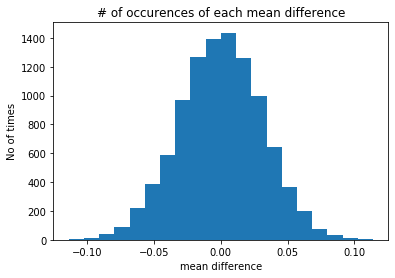

In [21]:
x = results
plt.hist(x, bins=20)
plt.ylabel('No of times')
plt.xlabel('mean difference')
plt.title('# of occurences of each mean difference')
plt.show()

In [22]:
0.2888086642599278 - 0.18080357142857142

0.10800509283135637

In [23]:
k = 0.10800509283135637

In [24]:
count = len([i for i in results if i > k])
print ("The numbers greater than 0.10800509283135637 : " + str(count))

The numbers greater than 0.10800509283135637 : 5


## Conclusion
There are only 5 instances out of 10,000 of a simulated mean difference being greater than the real mean difference. Considering .005 is less than any reasonable Alpha value, we have evidence to suggest that the difference between a "low" relative humidity and a "high" relative humidity is significant for XFYICZOIWSBQSK-UHFFFAOYSA-N, with a high relative humidity leading to better quality crystals.

## JMXLWMIFDJCGBV-UHFFFAOYSA-N 

In [28]:
# percent of 3's and 4's in  lower quartile
89/109

0.8165137614678899

In [30]:
#percent of 3's and 4's in upper quartile
96/191

0.5026178010471204

In [38]:
def meanDifference(data, endOfFirstBin): 
    shuffle(data)
    G = (data[0:endOfFirstBin])
    H = (data[endOfFirstBin:])
    avg = np.random.normal(G)
    np.mean(G)
    avg2 = np.random.normal(H)
    np.mean(H)
    return (np.mean(G) - np.mean(H))
D = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
meanDifference(D, 109)

-0.031941976079542744

In [39]:
results2 = [meanDifference(P, 109) for trial in range(10000)]
print("Standard Deviation of sample is % s " 
                % (statistics.stdev(results)))

Standard Deviation of sample is 0.03194668302023189 


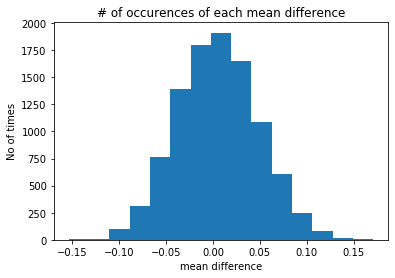

In [42]:
x = results2
plt.hist(x, bins=15)
plt.ylabel('No of times')
plt.xlabel('mean difference')
plt.title('# of occurences of each mean difference')
plt.show()

In [43]:
0.8165137614678899 - 0.5026178010471204

0.3138959604207695

In [45]:
j = 0.3138959604207695

In [46]:
count = len([i for i in results if i > j])
print ("The numbers greater than 0.04018974270544268 : " + str(count))

The numbers greater than 0.04018974270544268 : 0


## CONCLUSION:

There are 0 instances out of 10,000 of a simulated mean difference being greater than the real mean difference. Considering 0 is less than any reasonable Alpha value, we have evidence to suggest that the difference between a "low" relative humidity and a "high" relative humidity is significant for JMXLWMIFDJCGBV-UHFFFAOYSA-N, with a low relative humidity leading to better quality crystals.

## CALQKRVFTWDYDG-UHFFFAOYSA-N

In [8]:
# 3s and 4s in lower quartile
32/96

0.3333333333333333

In [9]:
# 3s and 4s in upper quartile
5/46

0.10869565217391304

In [18]:
def meanDifference(data, endOfFirstBin): 
    shuffle(data)
    A = (data[0:endOfFirstBin])
    B = (data[endOfFirstBin:])
    avg = np.random.normal(A)
    np.mean(A)
    avg2 = np.random.normal(B)
    np.mean(B)
    return (np.mean(A) - np.mean(B))
C = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 
meanDifference(C, 96)

-0.12907608695652173

In [20]:
results3 = [meanDifference(C, 96) for trial in range(10000)]
print("Standard Deviation of sample is % s " 
                % (statistics.stdev(results3)))

Standard Deviation of sample is 0.07925736029992328 


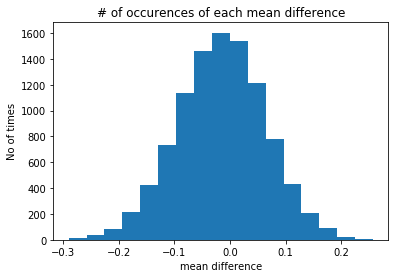

In [24]:
x = results3
plt.hist(x, bins=17)
plt.ylabel('No of times')
plt.xlabel('mean difference')
plt.title('# of occurences of each mean difference')
plt.show()

In [28]:
E = .3333333333333333 - 0.10869565217391304
print (E)

0.2246376811594203


In [30]:
count = len([i for i in results3 if i > E])
print ("The numbers greater than 0.2246376811594203 : " + str(count))

The numbers greater than 0.2246376811594203 : 5


### CONCLUSION:
There are 5 instances out of 10,000 of a simulated mean difference being greater than the real mean difference. Considering .005 is less than any reasonable Alpha value, we have evidence to suggest that the difference between a "low" relative humidity and a "high" relative humidity is significant for CALQKRVFTWDYDG-UHFFFAOYSA-N, with a low relative humidity leading to better quality crystals.

# GGYGJCFIYJVWIP-UHFFFAOYSA-N 

In [31]:
# 3s and 4s in lower quartile
55/145

0.3793103448275862

In [32]:
# 3s and 4s in upper quartile
173/271

0.6383763837638377

In [36]:
H = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [37]:
def meanDifference(data, endOfFirstBin): 
    shuffle(data)
    F = (data[0:endOfFirstBin])
    G = (data[endOfFirstBin:])
    avg = np.random.normal(F)
    np.mean(F)
    avg2 = np.random.normal(G)
    np.mean(G)
    return (np.mean(F) - np.mean(G))
H = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
meanDifference(H, 145)

-0.0016408152800923004

In [38]:
results4 = [meanDifference(H, 155) for trial in range(10000)]
print("Standard Deviation of sample is % s " 
                % (statistics.stdev(results4)))

Standard Deviation of sample is 0.049777098799708666 


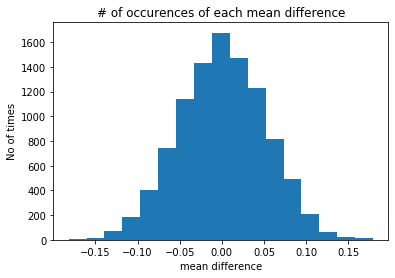

In [41]:
x = results4
plt.hist(x, bins=17)
plt.ylabel('No of times')
plt.xlabel('mean difference')
plt.title('# of occurences of each mean difference')
plt.show()

In [42]:
I = 0.6383763837638377 - 0.3793103448275862
print (I)

0.25906603893625146


In [65]:
count = len([i for i in results4 if i > I])
print ("The numbers greater than 0.25906603893625146 : " + str(count))

The numbers greater than 0.25906603893625146 : 0


### CONCLUSION:
There are 0 instances out of 10,000 of a simulated mean difference being greater than the real mean difference. Considering 0 is less than any reasonable Alpha value, we have evidence to suggest that the difference between a "low" relative humidity and a "high" relative humidity is significant forGGYGJCFIYJVWIP-UHFFFAOYSA-N, with a high relative humidity leading to better quality crystals.

# VMLAEGAAHIIWJX-UHFFFAOYSA-N

In [45]:
# 3s and 4s in lower quartile
6/96

0.0625

In [46]:
# 3s and 4s in upper quartile
12/47

0.2553191489361702

In [49]:
def meanDifference(data, endOfFirstBin): 
    shuffle(data)
    J = (data[0:endOfFirstBin])
    K = (data[endOfFirstBin:])
    avg = np.random.normal(J)
    np.mean(J)
    avg2 = np.random.normal(K)
    np.mean(K)
    return (np.mean(J) - np.mean(K))
L = [1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
meanDifference(L, 96)

0.09242021276595745

In [50]:
results5 = [meanDifference(L, 96) for trial in range(10000)]
print("Standard Deviation of sample is % s " 
                % (statistics.stdev(results5)))

Standard Deviation of sample is 0.058906184519971996 


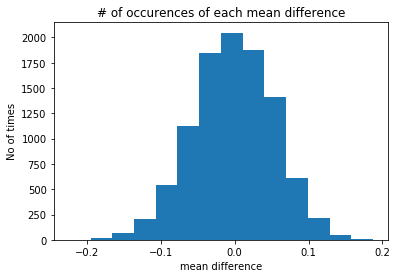

In [60]:
x = results5
plt.hist(x, bins=14)
plt.ylabel('No of times')
plt.xlabel('mean difference')
plt.title('# of occurences of each mean difference')
plt.show()

In [61]:
M = 0.2553191489361702 - 0.0625
print(M)

0.1928191489361702


In [71]:
count = len([i for i in results5 if i > M])
print ("The numbers greater than 0.1928191489361702 : " + str(count))

The numbers greater than 0.1928191489361702 : 0


### CONCLUSION:
There are 0 instances out of 10,000 of a simulated mean difference being greater than the real mean difference. Considering 0 is less than any reasonable Alpha value, we have evidence to suggest that the difference between a "low" relative humidity and a "high" relative humidity is significant for VMLAEGAAHIIWJX-UHFFFAOYSA-N, with a high relative humidity leading to better quality crystals.


# FCTHQYIDLRRROX-UHFFFAOYSA-N

In [80]:
my_list = [1]
my_list2 = [0]
my_list3 = [1]
my_list4 = [0]
n = 0
n2 = 96
n3 = 3 
n4 = 91
print(my_list * n, my_list2 * n2, my_list3 * n3, my_list4 * n4) #to generate the necessary 1s and 0s for significance test

[] [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] [1, 1, 1] [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [5]:
# 3s and 4s in lower quartile
49/94

0.5212765957446809

In [6]:
# 3s and 4s in upper quartile
54/90

0.6

In [8]:
def meanDifference(data, endOfFirstBin): 
    shuffle(data)
    N = (data[0:endOfFirstBin])
    O = (data[endOfFirstBin:])
    avg = np.random.normal(N)
    np.mean(N)
    avg2 = np.random.normal(O)
    np.mean(O)
    return (np.mean(N) - np.mean(O))
P = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
meanDifference(P, 94)

0.008274231678486954

In [10]:
results6 = [meanDifference(P, 94) for trial in range(10000)]
print("Standard Deviation of sample is % s " 
                % (statistics.stdev(results6)))

Standard Deviation of sample is 0.07338177708535795 


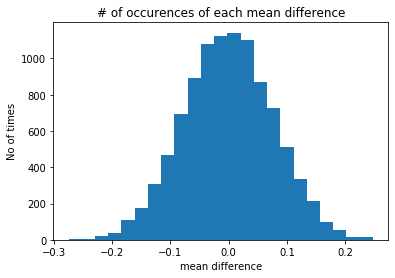

In [17]:
x = results6
plt.hist(x, bins=23)
plt.ylabel('No of times')
plt.xlabel('mean difference')
plt.title('# of occurences of each mean difference')
plt.show()

In [18]:
Q = 0.6 - 0.5212765957446809
print(Q)

0.0787234042553191


In [22]:
count = len([i for i in results6 if i > Q])
print ("The numbers greater than 0.0787234042553191 : " + str(count))

The numbers greater than 0.0787234042553191 : 1246


### CONCLUSION:
There are 1246 instances out of 10,000 of a simulated mean difference being greater than the real mean difference. Considering .1246 is greater than any reasonable Alpha value, we have evidence to suggest that there is no difference between a "low" relative humidity and a "high" relative humidity for FCTHQYIDLRRROX-UHFFFAOYSA-N, with no definitive relative humidity leading to better quality crystals.

# PXWSKGXEHZHFJA-UHFFFAOYSA-N

In [25]:
# 3s and 4s for lower quartile
1/94


0.010638297872340425

In [26]:
#3s and 4s for upper quartile
1/48

0.020833333333333332

In [28]:
def meanDifference(data, endOfFirstBin): 
    shuffle(data)
    R = (data[0:endOfFirstBin])
    S = (data[endOfFirstBin:])
    avg = np.random.normal(R)
    np.mean(R)
    avg2 = np.random.normal(S)
    np.mean(S)
    return (np.mean(R) - np.mean(S))
T = [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
meanDifference(T, 94)

-0.010195035460992907

In [29]:
results7 = [meanDifference(T, 94) for trial in range(10000)]
print("Standard Deviation of sample is % s " 
                % (statistics.stdev(results7)))

Standard Deviation of sample is 0.02101797472368959 


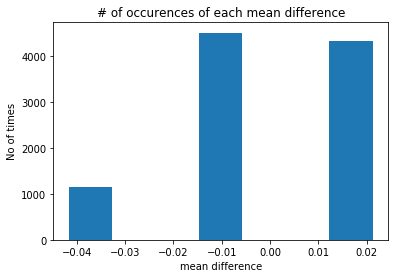

In [36]:
x = results7
plt.hist(x, bins=7)
plt.ylabel('No of times')
plt.xlabel('mean difference')
plt.title('# of occurences of each mean difference')
plt.show()

In [38]:
U = 0.020833333333333332 - 0.010638297872340425
print(U)

0.010195035460992907


In [41]:
count = len([i for i in results7 if i > U])
print ("The numbers greater than 0.010195035460992907 : " + str(count))

The numbers greater than 0.010195035460992907 : 4341


### CONCLUSION:
There are 4341 instances out of 10,000 of a simulated mean difference being greater than the real mean difference. Considering .4341 is greater than any reasonable Alpha value, we have evidence to suggest that there is no difference between a "low" relative humidity and a "high" relative humidity for PXWSKGXEHZHFJA-UHFFFAOYSA-N, with no definitive relative humidity leading to better quality crystals.

# DMFMZFFIQRMJQZ-UHFFFAOYSA-N

In [42]:
# 3s and 4s in lower quartile
16/192

0.08333333333333333

In [43]:
# 3s and 4s in upper quartile
35/93

0.3763440860215054

In [45]:
def meanDifference(data, endOfFirstBin): 
    shuffle(data)
    V = (data[0:endOfFirstBin])
    W = (data[endOfFirstBin:])
    avg = np.random.normal(V)
    np.mean(V)
    avg2 = np.random.normal(W)
    np.mean(W)
    return (np.mean(V) - np.mean(W))
X = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
meanDifference(X, 192)

0.010248655913978472

In [46]:
results8 = [meanDifference(X, 192) for trial in range(10000)]
print("Standard Deviation of sample is % s " 
                % (statistics.stdev(results8)))

Standard Deviation of sample is 0.048727081642446136 


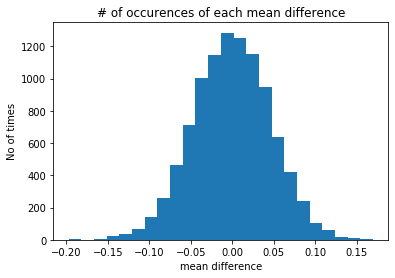

In [49]:
x = results8
plt.hist(x, bins=24)
plt.ylabel('No of times')
plt.xlabel('mean difference')
plt.title('# of occurences of each mean difference')
plt.show()

In [51]:
Y = 0.3763440860215054-0.08333333333333333
print(Y)

0.29301075268817206


In [66]:
count = len([i for i in results8 if i > Y])
print ("The numbers greater than 0.29301075268817206: " + str(count))

The numbers greater than 0.29301075268817206: 0


### CONCLUSION:
There are 0 instances out of 10,000 of a simulated mean difference being greater than the real mean difference. Considering 0 is less than any reasonable Alpha value, we have evidence to suggest that the difference between a "low" relative humidity and a "high" relative humidity is significant for DMFMZFFIQRMJQZ-UHFFFAOYSA-N, with a higher relative humidity leading to better quality crystals.

# QRFXELVDJSDWHX-UHFFFAOYSA-N

In [54]:
# 3s and 4s in lower quartile
12/94

0.1276595744680851

In [55]:
# 3s and 4s in upper quartils
37/45



0.8222222222222222

In [58]:
def meanDifference(data, endOfFirstBin): 
    shuffle(data)
    Z = (data[0:endOfFirstBin])
    a = (data[endOfFirstBin:])
    avg = np.random.normal(Z)
    np.mean(Z)
    avg2 = np.random.normal(a)
    np.mean(a)
    return (np.mean(Z) - np.mean(a))
b = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]
meanDifference(b, 94)

0.028368794326241176

In [59]:
results9 = [meanDifference(b, 94) for trial in range(10000)]
print("Standard Deviation of sample is % s " 
                % (statistics.stdev(results9)))

Standard Deviation of sample is 0.08614901806331103 


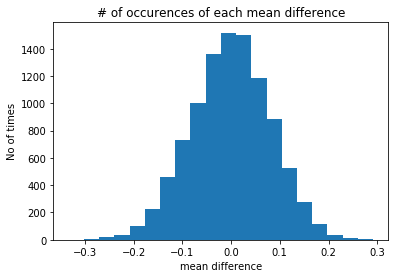

In [63]:
x = results9
plt.hist(x, bins=20)
plt.ylabel('No of times')
plt.xlabel('mean difference')
plt.title('# of occurences of each mean difference')
plt.show()

In [64]:
c = 0.8222222222222-0.1276595744680851
print(c)

0.6945626477541149


In [65]:
count = len([i for i in results9 if i > c])
print ("The numbers greater than 0.6945626477541149: " + str(count))

The numbers greater than 0.6945626477541149: 0


### CONCLUSION:
There are 0 instances out of 10,000 of a simulated mean difference being greater than the real mean difference. Considering 0 is less than any reasonable Alpha value, we have evidence to suggest that the difference between a "low" relative humidity and a "high" relative humidity is significant for QRFXELVDJSDWHX-UHFFFAOYSA-N, with a higher relative humidity leading to better quality crystals.

# UMDDLGMCNFAZDX-UHFFFAOYSA-O

In [67]:
# 3s and 4s in lower quartile
18/81

0.2222222222222222

In [68]:
#3s and 4s in upper quartile
54/94

0.574468085106383

In [70]:
def meanDifference(data, endOfFirstBin): 
    shuffle(data)
    d = (data[0:endOfFirstBin])
    e = (data[endOfFirstBin:])
    avg = np.random.normal(d)
    np.mean(d)
    avg2 = np.random.normal(e)
    np.mean(e)
    return (np.mean(d) - np.mean(e))
f = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
meanDifference(f, 81)

-0.12411347517730498

In [71]:
results10 = [meanDifference(b, 81) for trial in range(10000)]
print("Standard Deviation of sample is % s " 
                % (statistics.stdev(results10)))

Standard Deviation of sample is 0.08180595862780836 


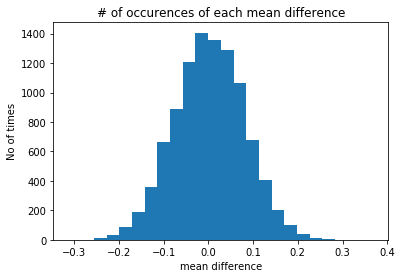

In [75]:
x = results10
plt.hist(x, bins=24)
plt.ylabel('No of times')
plt.xlabel('mean difference')
plt.title('# of occurences of each mean difference')
plt.show()

In [76]:
g = 0.574468085106383-0.2222222222222222
print(g)

0.3522458628841608


In [77]:
count = len([i for i in results10 if i > g])
print ("The numbers greater than 0.3522458628841608: " + str(count))

The numbers greater than 0.3522458628841608: 1


### CONCLUSION:
There is 1 instance out of 10,000 of a simulated mean difference being greater than the real mean difference. Considering 0 is less than any reasonable Alpha value, we have evidence to suggest that the difference between a "low" relative humidity and a "high" relative humidity is significant for UMDDLGMCNFAZDX-UHFFFAOYSA-O, with a higher relative humidity leading to better quality crystals.


# SQXJHWOXNLTOOO-UHFFFAOYSA-N

In [78]:
# 3s and 4s in the lower quartile
0/87

0.0

In [79]:
#3s and 4s in the upper quartile
3/94

0.031914893617021274

In [81]:
def meanDifference(data, endOfFirstBin): 
    shuffle(data)
    h = (data[0:endOfFirstBin])
    i = (data[endOfFirstBin:])
    avg = np.random.normal(h)
    np.mean(h)
    avg2 = np.random.normal(i)
    np.mean(i)
    return (np.mean(h) - np.mean(i))
j = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
meanDifference(j, 96)

-0.010859929078014184

In [82]:
results11 = [meanDifference(b, 96) for trial in range(10000)]
print("Standard Deviation of sample is % s " 
                % (statistics.stdev(results11)))

Standard Deviation of sample is 0.08774237861644507 


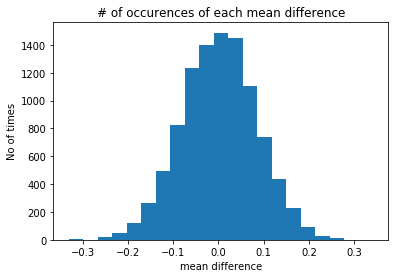

In [86]:
x = results11
plt.hist(x, bins=21)
plt.ylabel('No of times')
plt.xlabel('mean difference')
plt.title('# of occurences of each mean difference')
plt.show()

In [87]:
k =0.031914893617021274-0
print(k)

0.031914893617021274


In [88]:
count = len([i for i in results10 if i > k])
print ("The numbers greater than 0.031914893617021274: " + str(count))

The numbers greater than 0.031914893617021274: 3793


### CONCLUSION:
There are 3793 instances out of 10,000 of a simulated mean difference being greater than the real mean difference. Considering .3793 is greater than any reasonable Alpha value, we have evidence to suggest that there is no difference between a "low" relative humidity and a "high" relative humidity for SQXJHWOXNLTOOO-UHFFFAOYSA-N, with no definitive relative humidity leading to better quality crystals.